In [224]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.optim import SGD

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [225]:
INPUT_DIMENSION=2
OUTPUT_DIMENSION=1
NUMBER_OF_SAMPLES=10000
EPOCHS=100
LR=0.01

In [226]:
class LinearClassifier(torch.nn.Module):
  def __init__(self):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(in_features=INPUT_DIMENSION, out_features=OUTPUT_DIMENSION)

  def forward(self, x):
    x = self.linear(x)
    return x

In [227]:
SAMPLE_SIZE=50

In [228]:
x_0=np.random.random(SAMPLE_SIZE)
x_1=np.random.random(SAMPLE_SIZE)

X_0=2*x_0+np.ones(SAMPLE_SIZE)+np.random.normal(0,0.3,SAMPLE_SIZE)
X_1=2*x_1-np.ones(SAMPLE_SIZE)+np.random.normal(0,0.3,SAMPLE_SIZE)

X_0=np.vstack((x_0,X_0)).T
X_1=np.vstack((x_1,X_1)).T

X=np.concatenate((X_0,X_1))
y=np.concatenate((np.zeros(len(X_0)),np.ones(len(X_1))))

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [229]:
def next_batch(inputs, targets, batchSize):
	for i in range(0, inputs.shape[0], batchSize):
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [230]:
model = LinearClassifier()

opt = SGD(model.parameters(), lr=LR)
lossFunc = nn.MSELoss()

decision_boundaries=[]
epoch_list=[]

for epoch in range(EPOCHS):
	if (epoch+1)%10==0:
		x1=np.linspace(0,1,100)
		x2=np.linspace(min(X[:,1]),max(X[:,1]),100)
		x=np.vstack((x1,x2)).T
		decision_boundaries.append(model(torch.from_numpy(x).float()).reshape(1,100)[0].detach().numpy())
		epoch_list.append(epoch)
	for (batchX, batchY) in next_batch(X, y, 5):
		predictions = model(batchX)
		loss = lossFunc(predictions.view(-1), batchY)
		opt.zero_grad()
		loss.backward()
		opt.step()
	print("Epoch: {} Train Loss: {:.3f}".format(epoch+1,loss.item()))

Epoch: 1 Train Loss: 0.256
Epoch: 2 Train Loss: 0.173
Epoch: 3 Train Loss: 0.122
Epoch: 4 Train Loss: 0.089
Epoch: 5 Train Loss: 0.066
Epoch: 6 Train Loss: 0.051
Epoch: 7 Train Loss: 0.040
Epoch: 8 Train Loss: 0.033
Epoch: 9 Train Loss: 0.028
Epoch: 10 Train Loss: 0.024
Epoch: 11 Train Loss: 0.021
Epoch: 12 Train Loss: 0.019
Epoch: 13 Train Loss: 0.018
Epoch: 14 Train Loss: 0.017
Epoch: 15 Train Loss: 0.016
Epoch: 16 Train Loss: 0.015
Epoch: 17 Train Loss: 0.015
Epoch: 18 Train Loss: 0.015
Epoch: 19 Train Loss: 0.014
Epoch: 20 Train Loss: 0.014
Epoch: 21 Train Loss: 0.014
Epoch: 22 Train Loss: 0.014
Epoch: 23 Train Loss: 0.014
Epoch: 24 Train Loss: 0.014
Epoch: 25 Train Loss: 0.014
Epoch: 26 Train Loss: 0.014
Epoch: 27 Train Loss: 0.014
Epoch: 28 Train Loss: 0.014
Epoch: 29 Train Loss: 0.015
Epoch: 30 Train Loss: 0.015
Epoch: 31 Train Loss: 0.015
Epoch: 32 Train Loss: 0.015
Epoch: 33 Train Loss: 0.015
Epoch: 34 Train Loss: 0.015
Epoch: 35 Train Loss: 0.015
Epoch: 36 Train Loss: 0.015
E

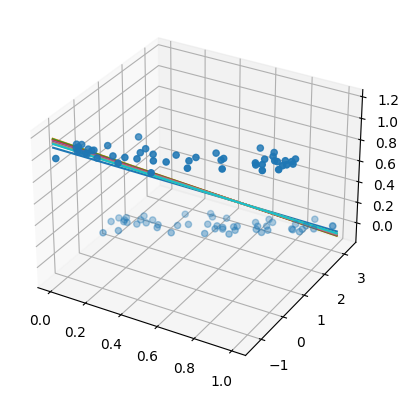

In [231]:
ax = plt.figure().add_subplot(projection='3d')

x1=np.linspace(0,1,100)
x2=np.linspace(min(X[:,1]),max(X[:,1]),100)
x=np.vstack((x1,x2)).T
for dec in decision_boundaries:
    ax.plot(x1,x2,dec)
ax.scatter(X[:,0],X[:,1],y)